# Análise de Dados e Inferência Estatística com Python

### Trabalho final - Aprendizado Não Supervisionado

**Professor:** Paulo Cotta

**Entrega:** 11/11/2019

O conjunto de dados para este projeto se origina do [repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Housing). Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston.

Neste projeto, você irá avaliar um conjunto de dados coletado dos imóveis dos subúrbios de Boston, Massachusetts. O principal objetivo deste trabalho é realizar a análise e começar a trabalhar com funções e métodos que serão utilizados no dia a dia de vocês como Engenheiros de Dados e/ou Engenheiros de Machine Learning.


**Vale lembrar que o trabalho terá situações que serão feitas em sala de aula (então nem todo o conteúdo foi abordado ainda), para qualquer dúvida pode procurar o professor.**

In [146]:
# Verificação se o sklearn está instalado na sua máquina
import sklearn
print("A versão do scikit-learn é ", sklearn.__version__)
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt

A versão do scikit-learn é  0.20.3


O sklearn é um framework que já possui alguns algoritmos de Machine Learning (ML) prontos. Eu recomento que utilizem sempre a ultima versão do framework.

Documentação: [link](https://scikit-learn.org/stable/)

Mediante ao cenário seguinte:

Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston. Para o propósito deste projeto, os passos de pré-processamento a seguir foram feitos para esse conjunto de dados:
- 16 observações de dados possuem um valor `'MEDV'` de 50.0. Essas observações provavelmente contêm **valores ausentes ou censurados** e foram removidas.
- 1 observação de dados tem um valor `'RM'` de 8.78. Essa observação pode ser considerada **valor atípico (outlier)** e foi removida.
- Os atributos `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` são essenciais. O resto dos **atributos irrelevantes** foram excluídos.
- O atributo `'MEDV'` foi **escalonado multiplicativamente** para considerar 35 anos de inflação de mercado.

Fica mais tranquilo efetuar o trabalho conhecendo um pouco sobre o conjunto de dados (dataset).

In [147]:
# Execute a célula de código abaixo para carregar o conjunto dos dados dos imóveis de Boston
# Importar as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis de Boston
data = pd.read_csv('housing.csv')
prices = data['MEDV']
# Dropando a coluna com maior indice de valores ausentes
features = data.drop('MEDV', axis = 1)

data.info()

# Êxito
print("O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.".format(*data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB
O conjunto de dados de imóveis de Boston tem 489 pontos com 4 variáveis em cada.


In [136]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


### Explorando os dados

Você aluno deve efetuar uma investigação sobre os dados de imóveis de Boston e fornecerá suas observações. Familiarizar-se com os dados durante o processo de exploração é uma prática fundamental que ajuda você a entender melhor e justificar seus resultados.

Dado que o objetivo principal deste projeto é construir um modelo de trabalho que tem a capacidade de estimar valores dos imóveis, vamos precisar separar os conjuntos de dados em **atributos** e **variável alvo**. O **atributos**, `'RM'`, `'LSTAT'` e `'PTRATIO'`, nos dão informações quantitativas sobre cada ponto de dado. A **variável alvo**, `'MEDV'`, será a variável que procuramos estimar. Eles são armazenados em `features` e ` prices`, respectivamente.

In [137]:
# TODO: Preço mínimo dos dados
minimum_price = np.amin(prices)

# TODO: Preço máximo dos dados
maximum_price = np.amax(prices)

# TODO: Preço médio dos dados
mean_price = np.mean(prices)

# TODO: Preço mediano dos dados
median_price = np.median(prices)

# TODO: Desvio padrão do preço dos dados
std_price = np.std(prices)

# Mostrar as estatísticas calculadas
print("Estatísticas para os dados dos imóveis de Boston:\n")
print("Preço mínimo: ${:,.2f}".format(minimum_price))
print("Preço máximo: ${:,.2f}".format(maximum_price))
print("Preço médio: ${:,.2f}".format(mean_price))
print("Preço mediano: ${:,.2f}".format(median_price))
print("Desvio padrão dos preços: ${:,.2f}".format(std_price))

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,171.13


In [9]:
# Trouxe os mesmo resultados apresentados e inclusive os Quartis
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


### Questão 1

Após apresentação dos dados, em formato não supervisionado, desenvolva utilizando K-means e ou GMM um classificador e apresente em formato de Data Visualization os clusters.

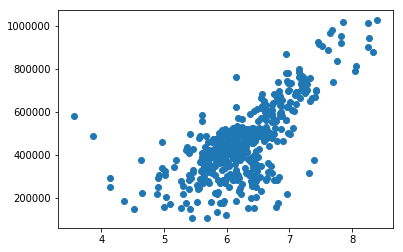

In [148]:

plt.scatter(features.values[:,0], prices.values)

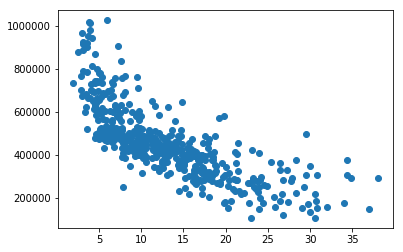

In [34]:
plt.scatter(features.values[:,1], prices.values)

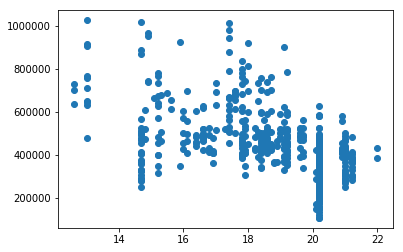

In [35]:
plt.scatter(features.values[:,2], prices.values)

In [194]:

gmm = GaussianMixture(n_components=4)
gmm.fit(data)
#from sklearn.cluster import KMeans
# Number of clusters
#kmeans = KMeans(n_clusters=7)
#kmeans.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

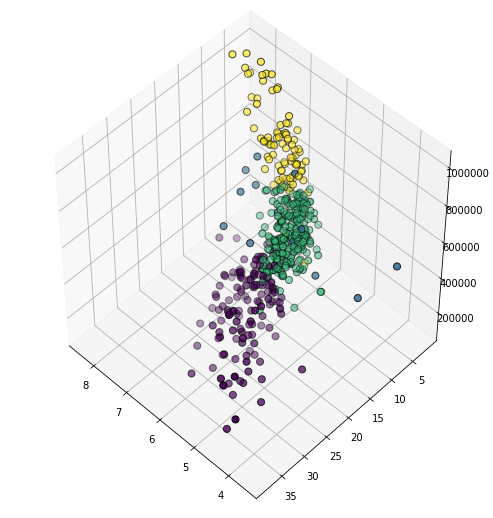

In [195]:
labels = gmm.predict(data)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(data.values[:, 0], data.values[:, 1], data.values[:, 3],
          c=labels.astype(np.float), edgecolor="k", s=50)
#plt.scatter(data.values[:,1], data.values[:,3], c=labels, cmap='viridis');